# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**Version:** 0.250406.1855

---

*Disclaimer: This notebook was AI-generated and has not been fully verified by human experts. Please be cautious when interpreting the code or results. Always cross-reference with official documentation and publications.*

---

## Overview of the Dandiset

This notebook explores Dandiset [001375](https://dandiarchive.org/dandiset/001375/0.250406.1855) titled "Septum GABA disruption with DREADDs".

**Description from Dandiset:** Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity.

**Dandiset URL:** [https://dandiarchive.org/dandiset/001375/0.250406.1855](https://dandiarchive.org/dandiset/001375/0.250406.1855)

## Notebook Summary

This notebook will cover the following:
1. Listing required Python packages.
2. Connecting to the DANDI archive and loading metadata for Dandiset 001375.
3. Listing some assets (files) within the Dandiset.
4. Loading a specific NWB (Neurodata Without Borders) file from the Dandiset.
5. Exploring and visualizing some of the data contained within the NWB file, including:
    - Raw electrophysiology recordings.
    - Spike times for neuronal units.
    - Trial information.
6. Summarizing findings and suggesting potential future analysis directions.

## Required Packages

The following Python packages are required to run this notebook. It is assumed they are already installed in your environment.

- `dandi` (for DANDI API client)
- `pynwb` (for reading NWB files)
- `h5py` (dependency for pynwb for HDF5 files)
- `remfile` (for streaming remote files)
- `numpy` (for numerical operations)
- `matplotlib` (for plotting)
- `seaborn` (for enhanced plot styling)
- `pandas` (for tabular data handling, e.g., from NWB tables)

## 1. Loading the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use seaborn styling for plots
sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001375"
dandiset_version = "0.250406.1855"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'N/A')}")

# List some assets in the Dandiset
assets_iterator = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets_iterator, 5):
    print(f"- Path: {asset.path}, Asset ID: {asset.identifier}, Size: {asset.size} bytes")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855
Dandiset description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity

First 5 assets:
- Path: sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb, Asset ID: ce525828-8534-4b56-9e47-d2a34d1aa897, Size: 54970745645 bytes
- Path: sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb, Asset ID: 376dc673-611b-4521-b135-9ec01c7f4f74, Size: 69445661969 bytes
- Path: sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb, Asset ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16, Size: 69788881498 bytes


## 2. Loading a Specific NWB File

We will load one of the NWB files from the Dandiset to explore its contents.
For this demonstration, we will use the file with path:
`sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`

Its asset ID is `ce525828-8534-4b56-9e47-d2a34d1aa897`.

The direct download URL for this asset, which we will use for streaming, is:
`https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/`

You can also explore this NWB file interactively on Neurosift:
[Neurosift Link](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft)

In [2]:
# NWB file URL (hardcoded based on prior tools_cli.py nwb-file-info output for chosen asset)
nwb_file_url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"

print(f"Loading NWB file from: {nwb_file_url}")

# Use remfile to stream the HDF5 file
# It's good practice to wrap file operations in try/finally to ensure they are closed
try:
    remote_f = remfile.File(nwb_file_url)
    h5_f = h5py.File(remote_f, mode='r') # Open in read-only mode
    io = pynwb.NWBHDF5IO(file=h5_f, load_namespaces=True, mode='r') # load_namespaces avoids warnings
    nwbfile = io.read()
    print("\nNWB file loaded successfully.")
    print(f"Identifier: {nwbfile.identifier}")
    print(f"Session description: {nwbfile.session_description}")
    print(f"Session start time: {nwbfile.session_start_time}")
    # Do not display the full nwbfile object here as it can be very large.
except Exception as e:
    print(f"Error loading NWB file: {e}")
    nwbfile = None # Set to None if loading fails

Loading NWB file from: https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully.
Identifier: MS13B
Session description: mouse running laps in virtual hallway
Session start time: 2024-07-25 19:00:00-07:00


### NWB File Contents Overview

The loaded `nwbfile` object provides access to various data modalities. Let's list some of the main groups:
- `nwbfile.acquisition`: Contains raw acquired data, often as TimeSeries objects.
- `nwbfile.processing`: Contains processed data.
- `nwbfile.intervals`: Contains information about labeled time intervals, like trials.
- `nwbfile.units`: Contains information about sorted spike units.
- `nwbfile.electrodes`: Contains information about electrode locations and properties.

We can get more details by inspecting these attributes. For example:
```python
print("Available acquisition data:", list(nwbfile.acquisition.keys()))
print("Available processing modules:", list(nwbfile.processing.keys()))
if nwbfile.trials:
    print("Trial columns:", nwbfile.trials.colnames)
if nwbfile.units:
    print("Units table columns:", nwbfile.units.colnames)
```
The specific contents depend on how the NWB file was generated. Based on previous exploration (using `tools_cli.py nwb-file-info`), we know this file contains:
- Raw electrophysiology data in `nwbfile.acquisition['time_series']`.
- Electrode group information in `nwbfile.electrode_groups`.
- Trial information in `nwbfile.intervals['trials']` (also `nwbfile.trials`).
- Unit (spike) information in `nwbfile.units`.

## 3. Exploring Data from the NWB File

Now, let's visualize some of the data.

### 3.1 Raw Electrophysiology Data

The raw ephys data is stored in `nwbfile.acquisition['time_series']`. This is typically a large dataset, so we will only load and plot a small snippet.

Raw data shape: (144675584, 256)
Sampling rate: 30000.0 Hz
Data unit: mV
Plotting 0.1s of data for channels: [0, 1, 2]


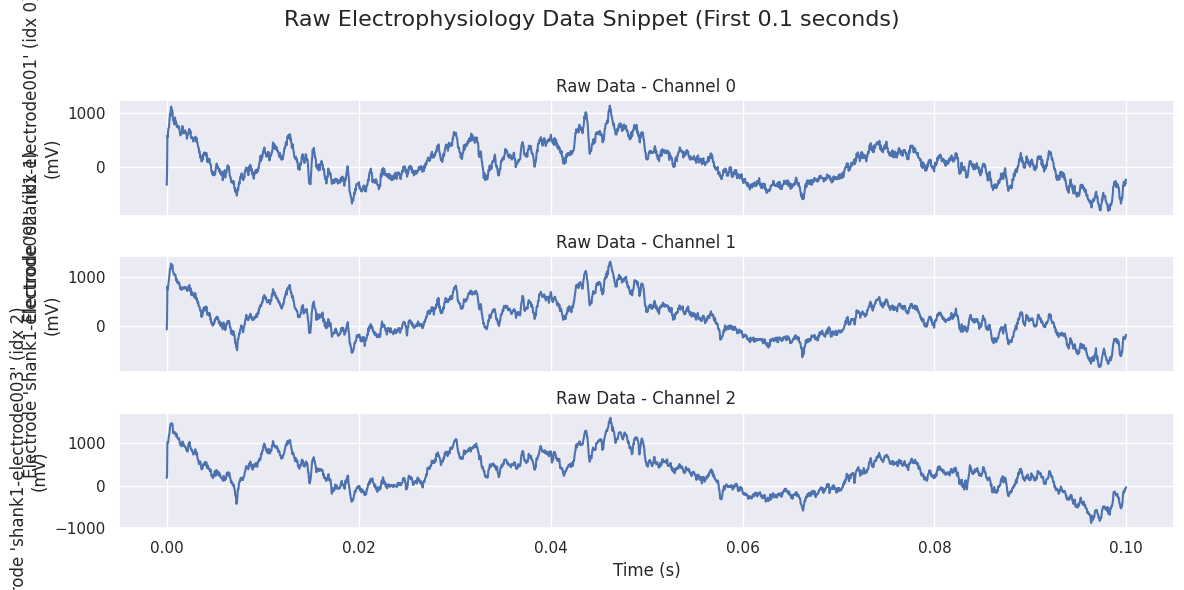

In [3]:
if nwbfile and 'time_series' in nwbfile.acquisition:
    raw_ts = nwbfile.acquisition['time_series']
    data = raw_ts.data
    sampling_rate = raw_ts.rate
    unit = raw_ts.unit

    print(f"Raw data shape: {data.shape}") # (num_samples, num_channels)
    print(f"Sampling rate: {sampling_rate} Hz")
    print(f"Data unit: {unit}")

    # Plot a short segment (e.g., 0.1 seconds) for the first few channels
    duration_to_plot_sec = 0.1  # seconds
    num_samples_to_plot = int(duration_to_plot_sec * sampling_rate)
    
    # Ensure we don't try to plot more samples than available, or more channels than available
    num_samples_to_plot = min(num_samples_to_plot, data.shape[0])
    channels_to_plot_indices = list(range(min(3, data.shape[1]))) # Plot up to 3 channels

    if num_samples_to_plot > 0 and channels_to_plot_indices:
        print(f"Plotting {duration_to_plot_sec}s of data for channels: {channels_to_plot_indices}")
        
        # Accessing data: data is an HDF5 dataset, so we need to slice it to load into memory
        # data_subset will be a numpy array
        data_subset = data[:num_samples_to_plot, channels_to_plot_indices]
        time_vector = np.arange(num_samples_to_plot) / sampling_rate

        fig, axes = plt.subplots(len(channels_to_plot_indices), 1, 
                                 figsize=(12, 2 * len(channels_to_plot_indices)), 
                                 sharex=True)
        if len(channels_to_plot_indices) == 1: # Handle single channel case for subplot indexing
            axes = [axes] 

        for i, ch_idx in enumerate(channels_to_plot_indices):
            axes[i].plot(time_vector, data_subset[:, i])
            # Try to get electrode label if available, otherwise use channel index
            electrode_label = f"Ch {ch_idx}"
            if nwbfile.electrodes is not None and 'label' in nwbfile.electrodes.colnames and ch_idx < len(nwbfile.electrodes):
                label_val = nwbfile.electrodes['label'][ch_idx]
                if isinstance(label_val, bytes): # decode if bytes
                    label_val = label_val.decode()
                electrode_label = f"Electrode '{label_val}' (idx {ch_idx})"

            axes[i].set_ylabel(f'{electrode_label}\n({unit})')
            axes[i].set_title(f'Raw Data - Channel {ch_idx}')

        axes[-1].set_xlabel('Time (s)')
        plt.suptitle(f'Raw Electrophysiology Data Snippet (First {duration_to_plot_sec} seconds)', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
    else:
        print("Not enough data or channels to plot the raw ephys snippet.")
else:
    print("Could not find 'time_series' in nwbfile.acquisition or NWB file not loaded.")

### 3.2 Spike Times (Units)

Sorted spike data is typically stored in `nwbfile.units`. This is a `DynamicTable` where each row represents a unit, and it often includes a `spike_times` column. Let's plot a raster of spike times for the first few units.

Found 33 units.
Units table columns: ('spike_times',)
Plotting spike times for the first 5 units (IDs might vary).


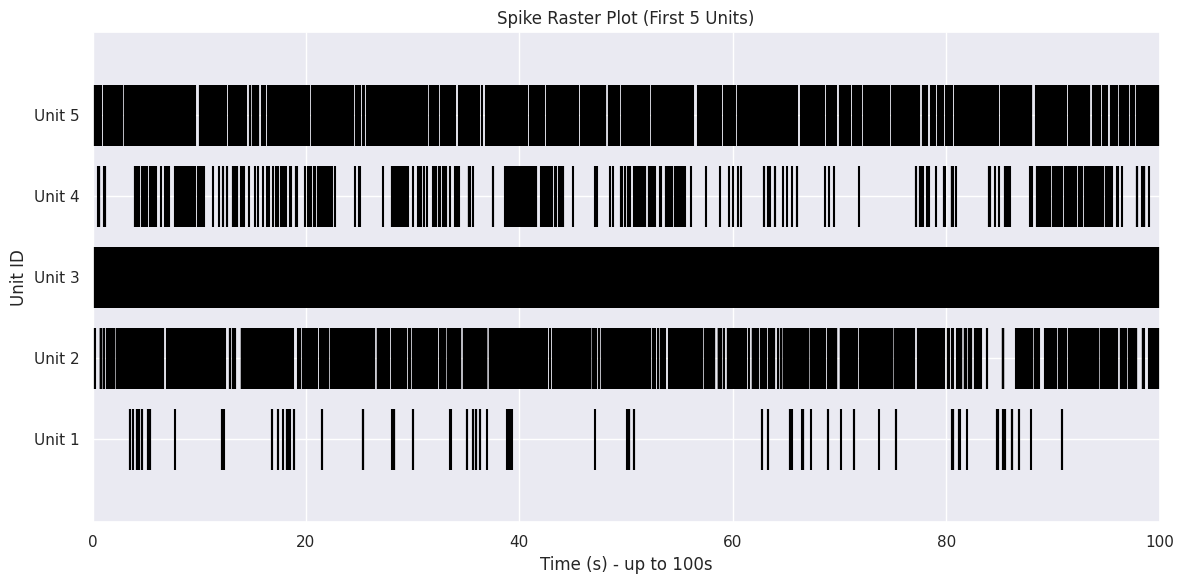

In [4]:
if nwbfile and nwbfile.units:
    units_table = nwbfile.units
    print(f"Found {len(units_table)} units.")
    print(f"Units table columns: {units_table.colnames}")

    # It's often useful to convert to a pandas DataFrame for easier inspection,
    # but be careful with very large 'spike_times' or 'waveforms' if they are included directly.
    # For just getting unit IDs and basic info, it's usually fine.
    # units_df = units_table.to_dataframe() # This can be slow if spike_times are huge.
    # For this plot, we directly access spike_times.

    num_units_to_plot = min(5, len(units_table)) # Plot up to 5 units
    
    # Check if 'spike_times' column exists
    if 'spike_times' not in units_table.colnames:
        print("No 'spike_times' column in the units table.")
    elif num_units_to_plot == 0:
        print("No units to plot.")
    else:
        spike_times_list = []
        labels = []
        
        # Get unit IDs. If the index of the units_table is meaningful (actual unit IDs), use them.
        # Otherwise, just use row numbers.
        # The units_table index (nwbfile.units.id[:]) usually contains the actual unit IDs.
        unit_ids = units_table.id[:] if hasattr(units_table, 'id') and units_table.id is not None else list(range(len(units_table)))

        print(f"Plotting spike times for the first {num_units_to_plot} units (IDs might vary).")
        
        time_limit_sec = 100 # Limit spikes to the first 100 seconds for clarity

        for i in range(num_units_to_plot):
            unit_id = unit_ids[i]
            # Access spike times for the i-th unit in the table
            st = units_table['spike_times'][i] 
            
            # Filter spike times
            st_filtered = st[st < time_limit_sec]
            
            if len(st_filtered) > 0:
                spike_times_list.append(st_filtered)
                labels.append(f'Unit {unit_id}')
            else:
                print(f"Unit {unit_id} has no spikes before {time_limit_sec}s or is empty, skipping.")

        if spike_times_list:
            plt.figure(figsize=(12, 6))
            plt.eventplot(spike_times_list, linelengths=0.75, colors='black')
            plt.yticks(np.arange(len(labels)), labels)
            plt.xlabel(f'Time (s) - up to {time_limit_sec}s')
            plt.ylabel('Unit ID')
            plt.title(f'Spike Raster Plot (First {len(labels)} Units)')
            plt.xlim(0, time_limit_sec)
            plt.tight_layout()
            plt.show()
        else:
            print(f"No spike data to plot within the first {time_limit_sec} seconds for the selected units.")
else:
    print("No 'units' table found in nwbfile or NWB file not loaded.")

### 3.3 Trial Information

Information about experimental trials is often stored in `nwbfile.intervals['trials']` or accessible via `nwbfile.trials`. This is a `TimeIntervals` table, typically containing `start_time` and `stop_time` for each trial. Let's look at the distribution of trial durations.

Found 387 trials.
Trials table columns: ('start_time', 'stop_time')


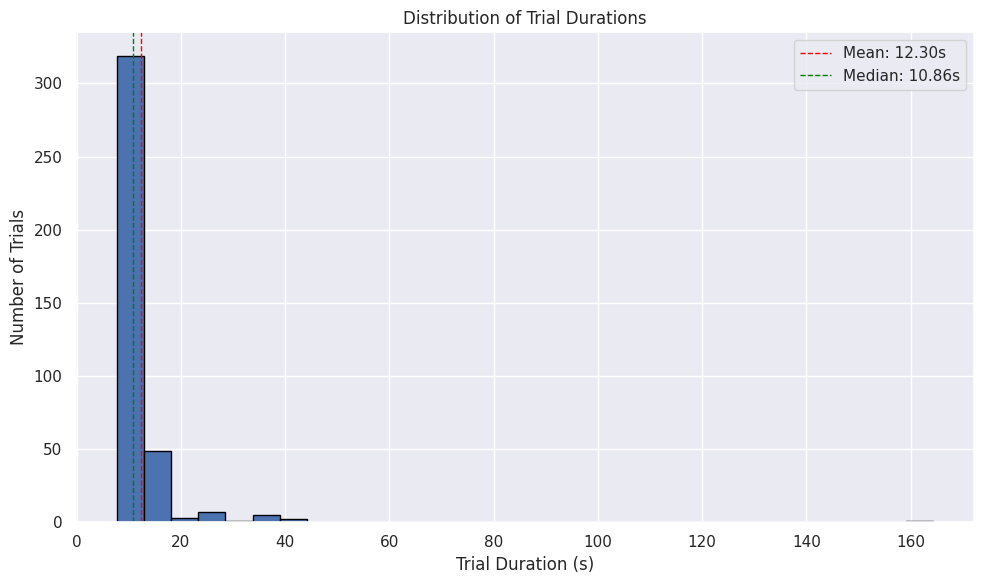


Min trial duration: 7.66s
Max trial duration: 164.31s
Mean trial duration: 12.30s
Median trial duration: 10.86s


In [5]:
if nwbfile and nwbfile.trials:
    trials_table = nwbfile.trials
    print(f"Found {len(trials_table)} trials.")
    print(f"Trials table columns: {trials_table.colnames}")

    if 'start_time' in trials_table.colnames and 'stop_time' in trials_table.colnames:
        # Load all start and stop times into memory. For a few hundred trials, this is fine.
        start_times = trials_table['start_time'][:]
        stop_times = trials_table['stop_time'][:]
        
        if len(start_times) > 0:
            trial_durations = stop_times - start_times
            
            plt.figure(figsize=(10, 6))
            plt.hist(trial_durations, bins=30, edgecolor='black')
            plt.xlabel('Trial Duration (s)')
            plt.ylabel('Number of Trials')
            plt.title('Distribution of Trial Durations')
            
            mean_duration = np.mean(trial_durations)
            median_duration = np.median(trial_durations)
            plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_duration:.2f}s')
            plt.axvline(median_duration, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_duration:.2f}s')
            plt.legend()
            
            plt.tight_layout()
            plt.show()
            
            print(f"\nMin trial duration: {np.min(trial_durations):.2f}s")
            print(f"Max trial duration: {np.max(trial_durations):.2f}s")
            print(f"Mean trial duration: {mean_duration:.2f}s")
            print(f"Median trial duration: {median_duration:.2f}s")
        else:
            print("Trials table is empty, cannot plot durations.")
    else:
        print("Trials table does not contain 'start_time' and 'stop_time' columns.")
else:
    print("No 'trials' table found in nwbfile or NWB file not loaded.")

## 4. Summary and Future Directions

This notebook demonstrated how to:
- Connect to the DANDI Archive and retrieve Dandiset metadata and asset lists.
- Load a specific NWB file by streaming it from its DANDI URL.
- Access and visualize key data types from the NWB file:
    - A snippet of raw electrophysiology data.
    - Spike times for sorted units in a raster plot.
    - Distribution of trial durations.

### Observations:
- The raw electrophysiology data shows continuous neural activity across multiple channels.
- The spike raster plot revealed diverse firing patterns among the first few units, with some units firing sparsely and others more densely.
- Trial durations are predominantly short (around 10-12 seconds), with a right-skewed distribution indicating some much longer trials.

### Possible Future Directions:

1.  **Detailed Single Unit Analysis:**
    *   Calculate firing rates and inter-spike interval (ISI) distributions for individual units.
    *   If waveform data is available (`nwbfile.units['waveforms']`), visualize average waveforms.

2.  **Correlational Analyses:**
    *   Compute cross-correlations between spike trains of different units to investigate potential functional connectivity.
    *   Relate neural activity (e.g., firing rates) to behavioral events or trial parameters if available (e.g., by aligning to `nwbfile.trials` start/stop times or other custom columns).

3.  **LFP Analysis:**
    *   If the raw data contains Local Field Potentials (LFP), perform spectral analysis (e.g., power spectral density, spectrograms) to examine oscillatory activity. This might involve downsampling the raw `time_series` data.

4.  **Across Trials Analysis:**
    *   Create peri-stimulus time histograms (PSTHs) by aligning spike data to trial start times or other events within trials.

5.  **Explore Other NWB Files:**
    *   The Dandiset contains multiple NWB files. Similar analyses could be performed on other files to compare results across subjects or sessions.

6.  **Electrode Information:**
    *   Utilize `nwbfile.electrodes` table to understand the spatial layout of electrodes and potentially relate activity to electrode location (e.g. 'ventral hippocampus', 'visual cortex' as noted in `electrode_groups`).

Remember to consult the Dandiset's documentation and associated publications for more context on the experimental design and data.

---
*End of AI-generated notebook.*

In [6]:
# It's good practice to close the NWBHDF5IO object and the h5py.File object if they were opened.
# The try/finally block for loading handles this, but if we want to close it explicitly at the end of the notebook:
if 'io' in locals(): # Check if io exists
    try:
        # NWBHDF5IO.close() should handle cases where the file is already closed or wasn't properly opened.
        io.close()
        print("\nNWB IO object closed.")
    except Exception as e:
        print(f"Error closing NWB IO object: {e}")
# The h5_f and remote_f would typically be closed when 'io' is closed if 'io' owns them,
# or if they were managed by a context manager (which they are not explicitly here for persistence across cells).
# If h5_f was opened independently:
if 'h5_f' in locals() and h5_f.id.valid: # Check if h5_f exists and file is open
    try:
        h5_f.close()
        print("H5py file object closed.")
    except Exception as e:
        print(f"Error closing h5py file object: {e}")

if 'remote_f' in locals() and hasattr(remote_f, 'close'): # Check if remote_f exists and has close method
     try:
        remote_f.close()
        print("Remfile object closed.")
     except Exception as e:
        print(f"Error closing remfile object: {e}")


NWB IO object closed.
Remfile object closed.
